In [1]:
import numpy as np
import dame_flame
import matplotlib.pyplot as plt

# Generate Data
num_covariates = 10
df, true_catt = dame_flame.utils.data.generate_uniform_given_importance(50,50)

# Get matches using DAME and FLAME
model_dame = dame_flame.matching.DAME(repeats=False, verbose=3)
model_dame.fit(holdout_data=df)
result_dame = model_dame.predict(df)

model_flame = dame_flame.matching.FLAME(repeats=False, verbose=3)
model_flame.fit(holdout_data=df)
result_flame = model_flame.predict(df)

Iteration number:  1
	Number of matched groups formed in total:  24
	Unmatched treated units:  19 out of a total of  50 treated units
	Unmatched control units:  17 out of a total of  50 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  64
	Number of matches made so far:  64
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  30
	Unmatched treated units:  12 out of a total of  50 treated units
	Unmatched control units:  11 out of a total of  50 control units
	Predictive error of covariates chosen this iteration:  7.675842181553732
	Number of matches made in this iteration:  13
	Number of matches made so far:  77
	In this iteration, the covariates dropped are:  frozenset({'3'})
Iteration number:  3
	Number of matched groups formed in total:  31
	Unmatched treated units:  11 out of a total of  50 treated units
	Unmatched control units:  9 out of a total of 

In [2]:
# replace all the '*'s with NAs so we can get a count of the NAs. 
result_flame = result_flame.replace(to_replace='*', value=np.nan)
result_dame = result_dame.replace(to_replace='*', value=np.nan)

# rename columns for graph
X_columns = ["X" + col for col in result_flame.columns]
result_flame.columns = X_columns
result_dame.columns = X_columns

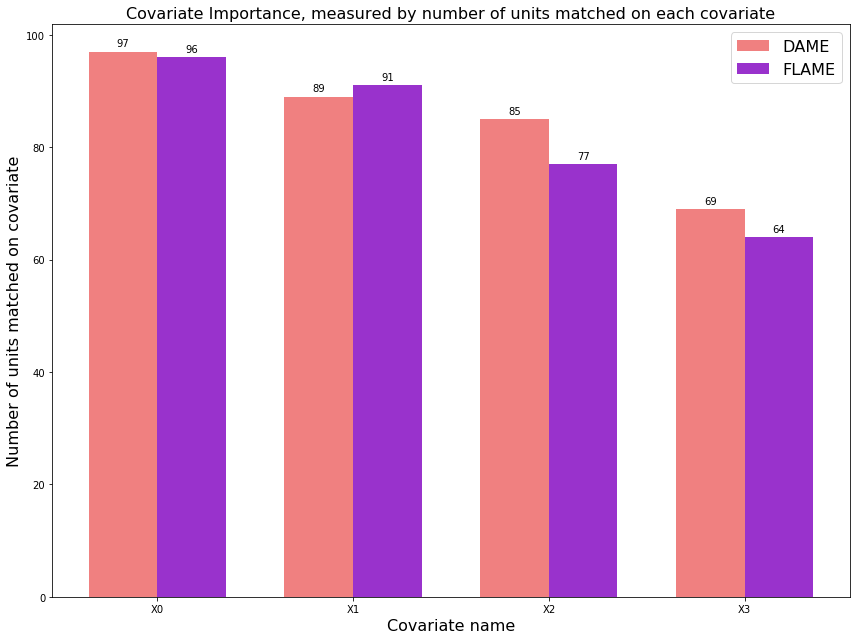

In [4]:
x = np.arange(len(result_flame.columns))  # the label locations
width = 0.35  # the width of the bars

f, ax = plt.subplots(figsize=(12,9))
rects1 = ax.bar(x - width/2,  result_dame.count(axis=0), width, color="lightcoral", label = "DAME" ) #, stopping at {}% control units matched".format(percent), hatch="/")
rects2 = ax.bar(x + width/2, result_flame.count(axis=0), width, color = "darkorchid", label = "FLAME") #, stopping at {}% control units matched".format(percent), hatch = "\\")
ax.set_ylabel('Number of units matched on covariate', fontsize=16)
ax.set_xlabel('Covariate name', fontsize=16)
ax.set_title('Covariate Importance, measured by number of units matched on each covariate', fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(result_flame.columns)
ax.legend(fontsize=16)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

f.tight_layout()

plt.savefig('covariate_importance.png')